### Code to plot a telemetry profile (Beta!)
#### 2021 01 20 CJH

In [318]:
from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from importlib import reload

In [303]:
import telemetry_plot_utils as tpu 
from telemetry_plot_utils import load_file

#### load data from pickle files in the /robot/sim/data folder

In [304]:
# get a list of all the files 
data_files = glob.glob('../robot/sim/data/*')
data_files

['../robot/sim/data\\20210128_174928_slalom_kpvel_0p2.pkl',
 '../robot/sim/data\\20210129_001101_slalom_kpvel_0p2.pkl',
 '../robot/sim/data\\20210129_002151_slalom_kpvel_0p2.pkl',
 '../robot/sim/data\\20210129_002529_slalom_kpvel_0p0.pkl',
 '../robot/sim/data\\20210129_003148_slalom_kpvel_0p0.pkl',
 '../robot/sim/data\\20210129_003929_slalom_kpvel_0p0.pkl',
 '../robot/sim/data\\20210129_004203_slalom_kpvel_0p0.pkl']

In [305]:
infile = data_files[-1]
telemetry = tpu.load_file(infile)

#### convert data to table, add vector data and correct for field starting point offsets

In [306]:
df = fix_data(telemetry, x_offset=1.2, y_offset=0.9) # starting offsets for 

#### take a quick look at the pandas datatable from the odometry

In [308]:
# want to do typical python slicing but that does not work with pandas so use a little logic to cut down the table for displaying here
df[(df.index) % 50 == 0].round(2)

,TIME,RBT_X,RBT_Y,RBT_TH,RBT_VEL,RBT_RVEL,RBT_LVEL,TRAJ_X,TRAJ_Y,TRAJ_TH,...,RAM_LVEL_SP,RAM_RVEL_SP,RAM_OM,LFF,RFF,LPID,RPID,DELTA,VEC_X,VEC_Y
0,0.08,1.20,0.90,0.00,0.00,0.00,0.01,2.51,1.56,0.01,...,0.25,0.33,0.13,1.67,1.86,0.0,0.0,0.00,0.00,0.00
50,5.08,3.77,2.83,0.81,0.38,0.48,0.27,3.94,2.77,0.90,...,0.59,0.41,-0.26,2.40,2.02,0.0,0.0,0.04,0.02,0.03
100,10.08,5.72,3.63,-0.17,0.42,0.44,0.40,5.78,3.73,-0.06,...,0.47,0.50,0.04,2.15,2.22,0.0,0.0,0.04,0.04,-0.01
150,15.08,7.50,2.73,-1.06,0.44,0.44,0.44,7.64,2.74,-0.97,...,0.48,0.58,0.15,2.18,2.39,0.0,0.0,0.04,0.02,-0.04
200,20.08,9.01,1.68,0.55,0.36,0.34,0.39,9.12,1.61,0.25,...,0.51,0.42,-0.13,2.23,2.04,0.0,0.0,0.03,0.03,0.02
250,25.08,9.66,2.77,2.15,0.39,0.40,0.38,9.77,2.95,2.05,...,0.45,0.50,0.08,2.10,2.22,0.0,0.0,0.04,-0.02,0.03
300,30.08,8.30,2.94,-2.40,0.28,0.23,0.33,8.19,3.11,-2.41,...,0.15,0.19,0.06,1.46,1.54,0.0,0.0,0.03,-0.02,-0.02
350,35.08,7.11,1.70,-3.06,0.36,0.44,0.29,7.10,1.60,-2.91,...,0.44,0.42,-0.02,2.08,2.05,0.0,0.0,0.03,-0.03,-0.00
400,40.08,4.79,1.65,2.99,0.49,0.51,0.47,4.74,1.62,2.99,...,0.53,0.49,-0.05,2.28,2.20,0.0,0.0,0.05,-0.05,0.01
450,45.08,3.25,2.96,2.60,0.46,0.36,0.56,3.15,2.94,2.47,...,0.25,0.54,0.42,1.68,2.30,0.0,0.0,0.05,-0.04,0.02


In [358]:
# get the points used to generate the trajectory
df_points = tpu.get_points_df(name='slalom')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.308553,0.958308,0.443237,0.002638,True,False,NaN
1,2.324412,1.453540,0.406344,0.723799,True,False,NaN
2,3.352969,2.748760,1.989482,1.595004,True,False,NaN
3,5.956108,2.685268,1.206758,-0.900119,True,False,NaN
4,7.568784,0.958308,1.285491,0.081475,True,False,NaN


#### make plots from robot telemetry data

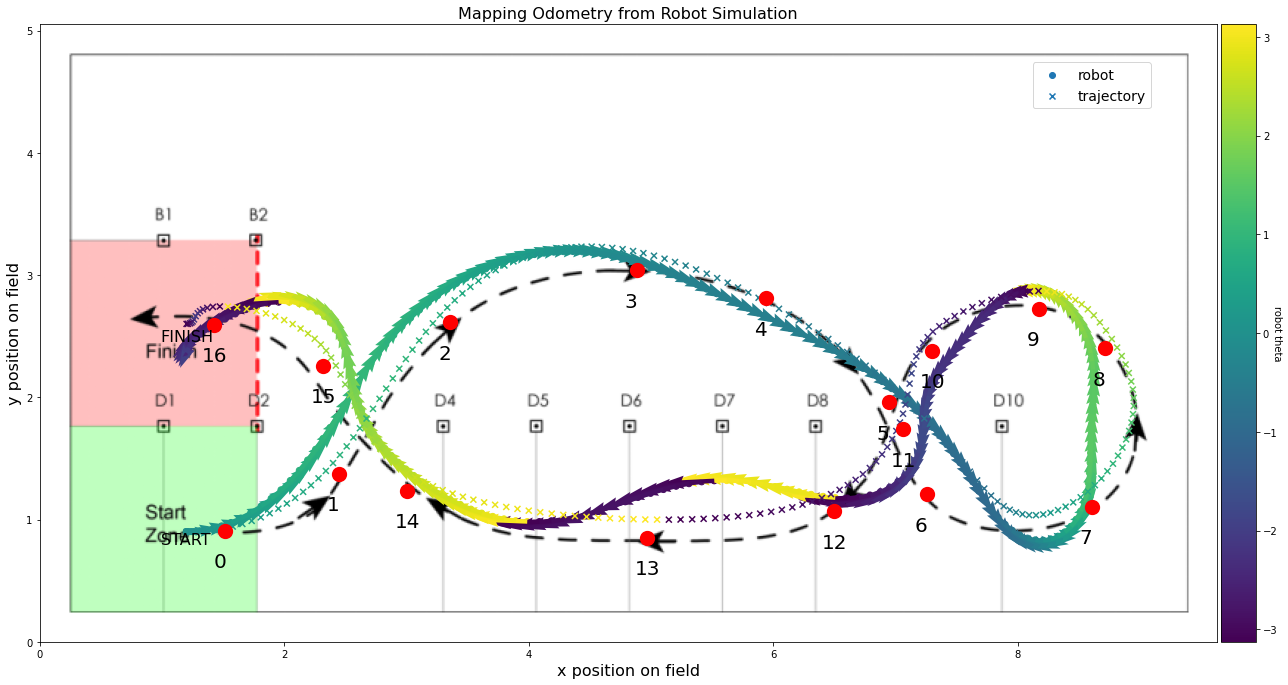

In [272]:
plot_df(df, point_list=plist, arrows=True, save=False)

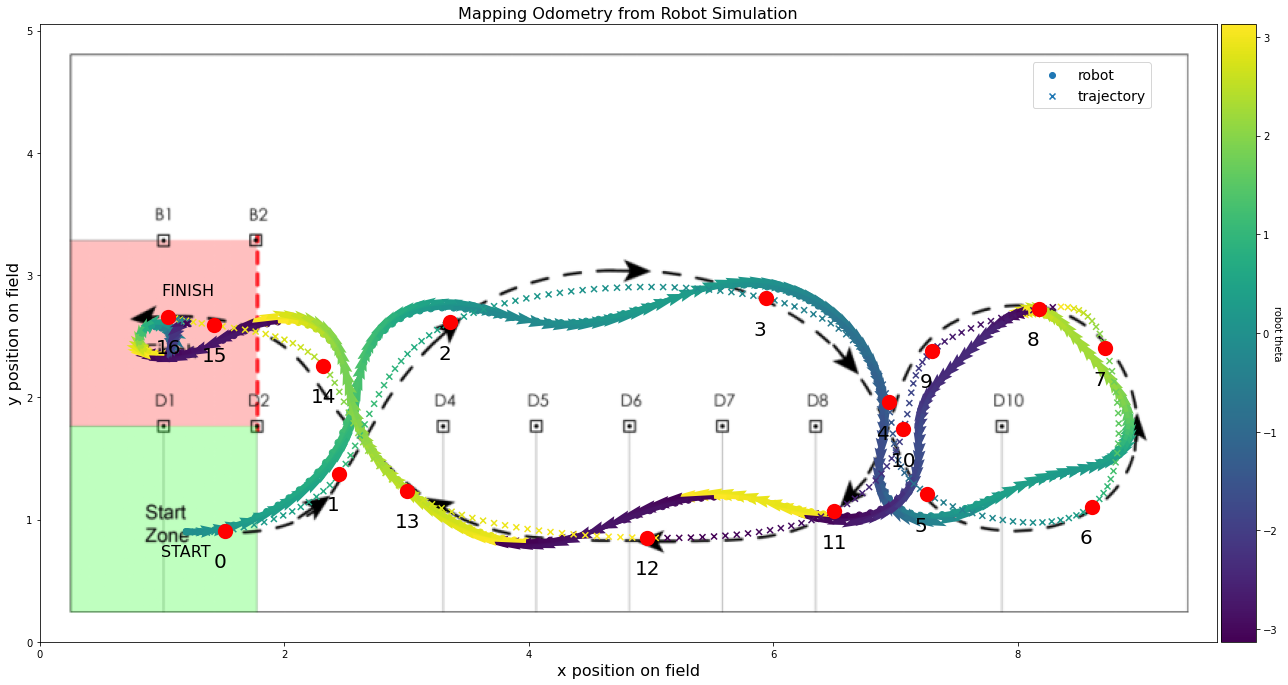

In [283]:
df2 = fix_data(telemetry, x_offset=1.2, y_offset=0.9) 
plot_df(df2, point_list=plist, arrows=True, save=False)

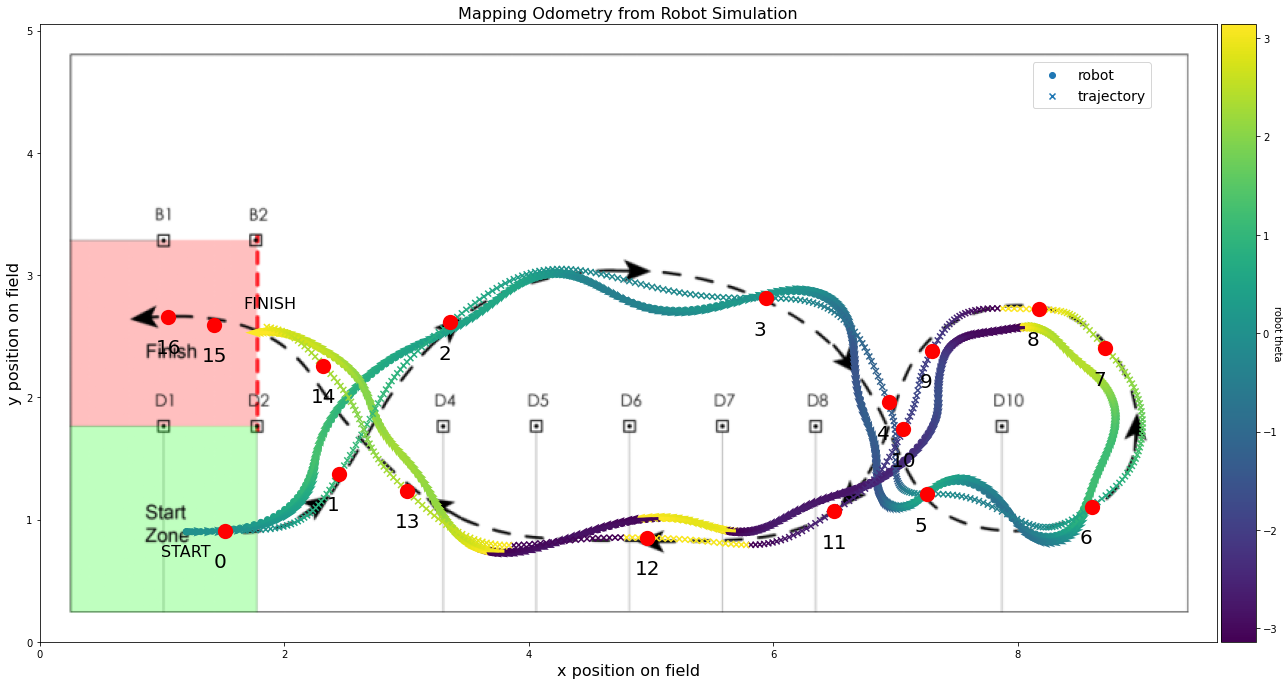

In [286]:
df3 = fix_data(telemetry, x_offset=1.2, y_offset=0.9) 
plot_df(df3, point_list=plist, arrows=True, save=False)

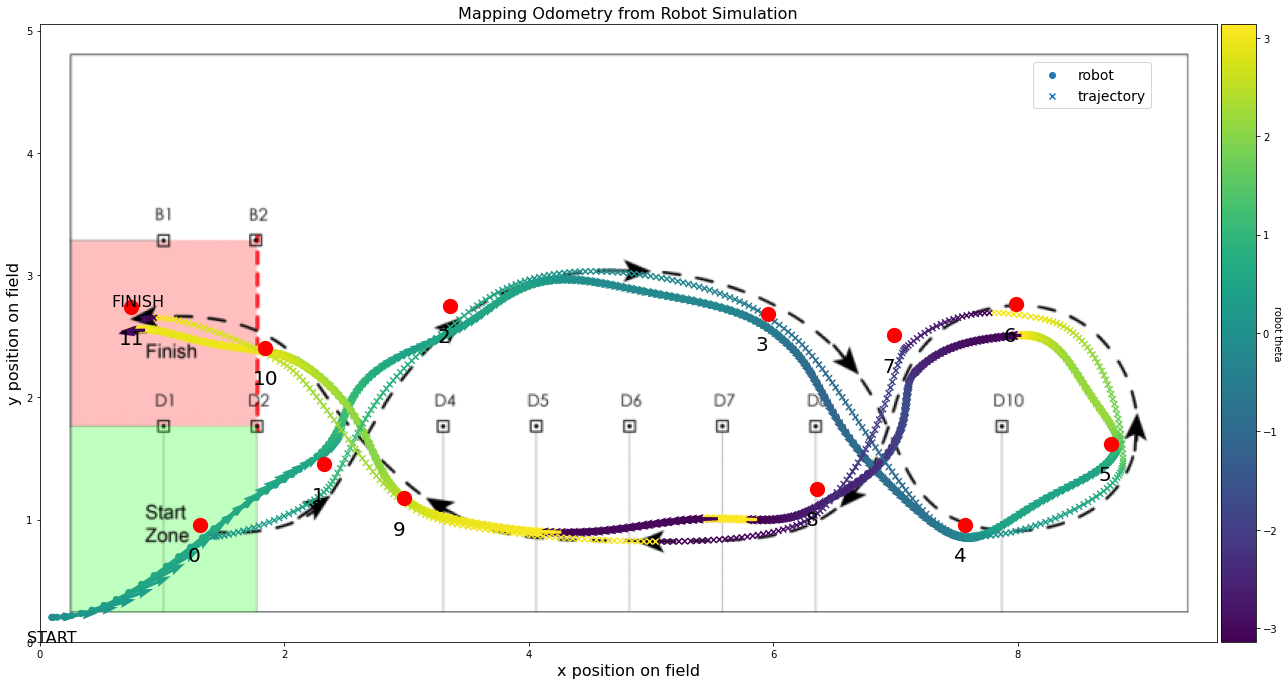

In [343]:
reload(tpu)
df4 = get_latest(x_offset=0.1, y_offset=0.2)
tpu.plot_df(df4, point_df=df_points, arrows=True, save=False)

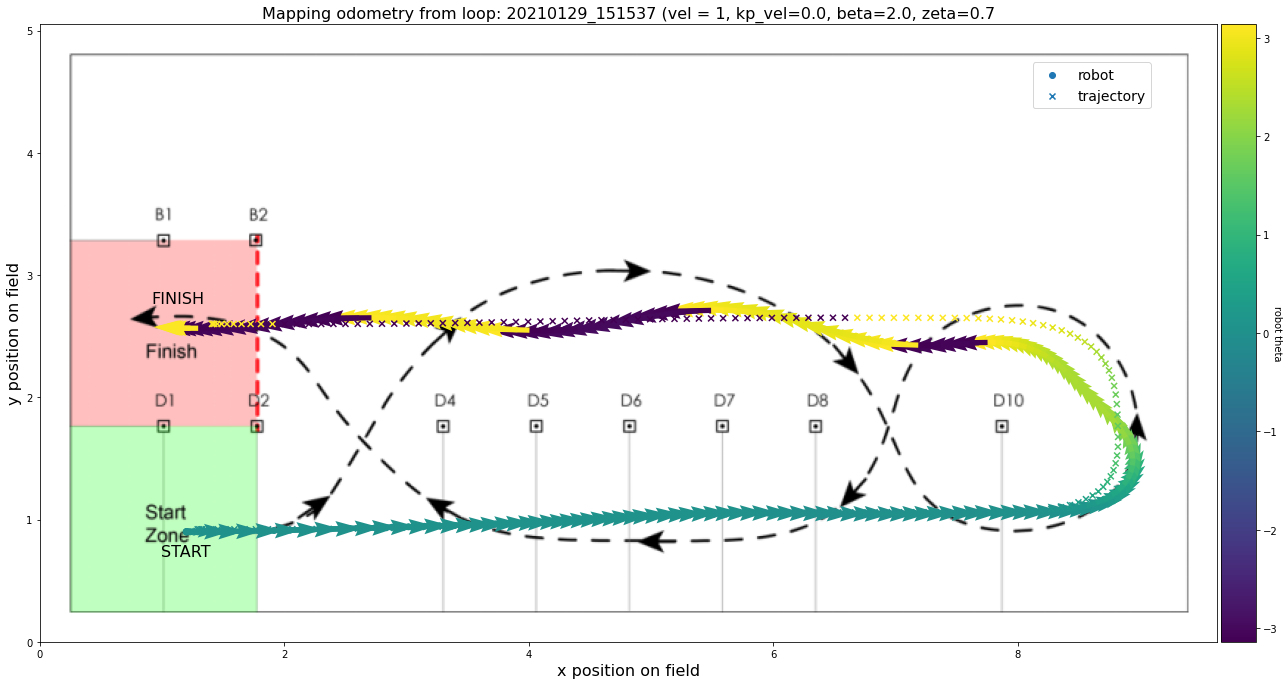

In [374]:
reload(tpu)
df_loop, telemetry_loop = tpu.get_data(file_name='20210129_151537', x_offset=1.2, y_offset=0.9)
tpu.plot_df(df_loop, telemetry_loop, point_df=None, arrows=True, save=False)

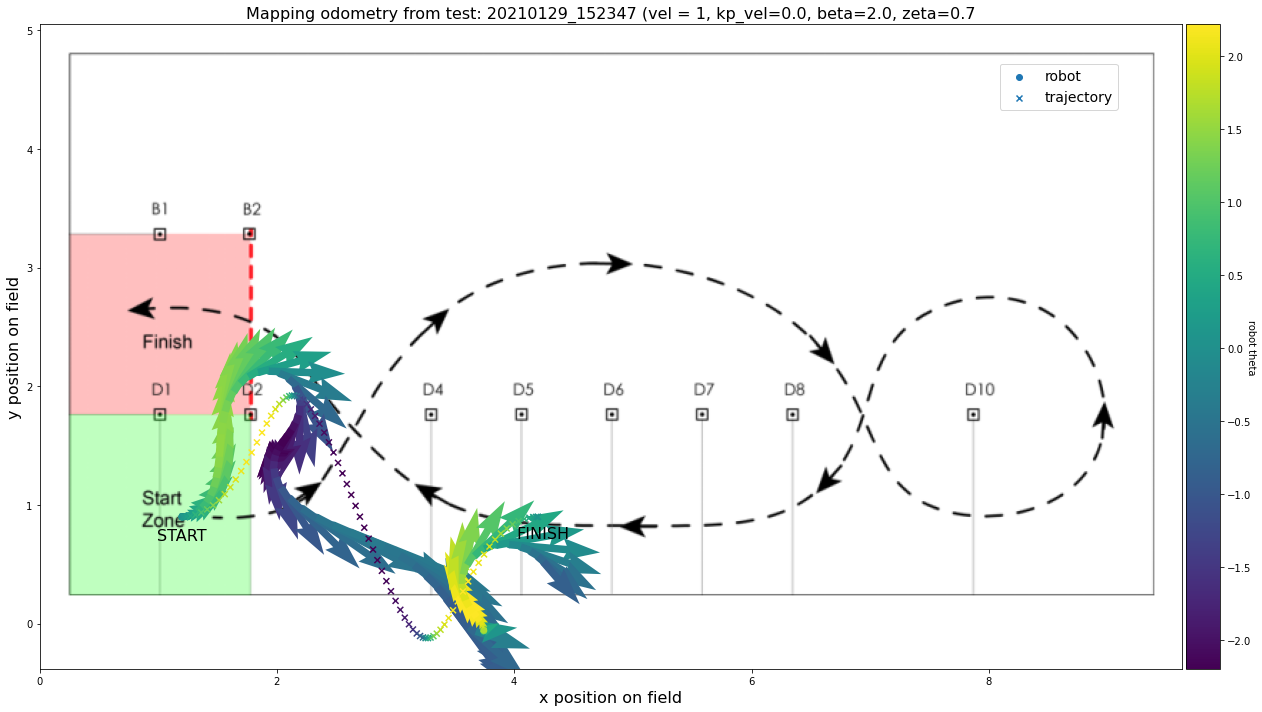

In [373]:
reload(tpu)
df_test, telemetry_test = tpu.get_data(file_name='20210129_152347', x_offset=1.2, y_offset=0.9)
tpu.plot_df(df_test, telemetry_test, point_df=None, arrows=True, save=False)

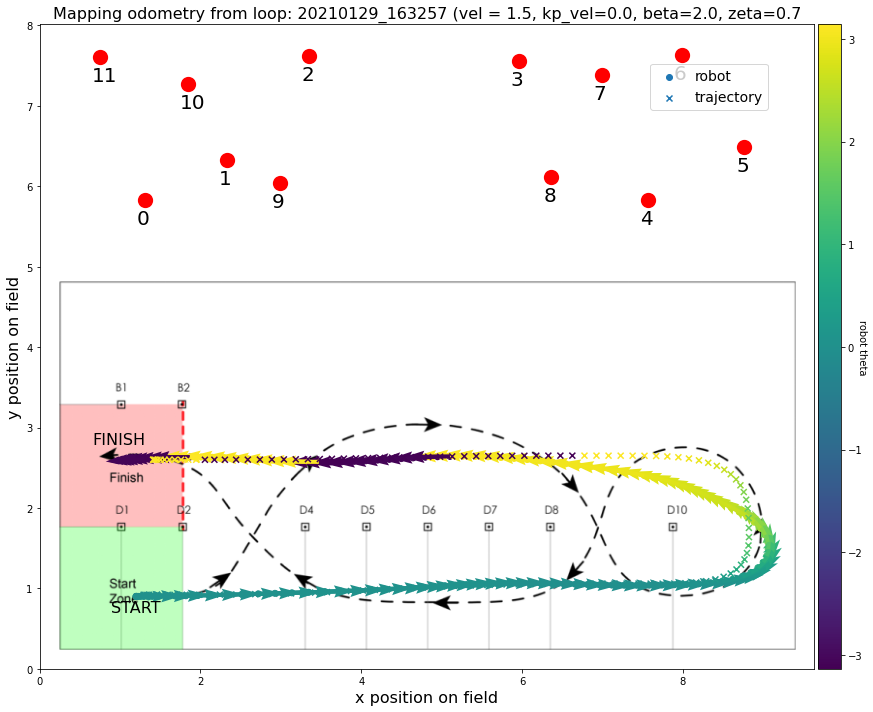

In [376]:
reload(tpu)
df_pts, telemetry_pts = tpu.get_data(file_name=None, x_offset=1.2, y_offset=0.9)
tpu.plot_df(df_pts, telemetry_pts, point_df=df_points, arrows=True, save=False)